---
## 01. Tarea

Carlos Andrés del Valle (cdelv@unal.edu.co)

---

## Ejercicio 1


# A)

Escriba una función que calcule las funciones de Bessel $J_m(x)$ utilizando la regla de Simpson con 1000 puntos en el intervalo de integración.

---

Para empezar, hay que recordar que una de las definiciones de la función de Bessel de orden $m$ es

$$
J_m(x)=\frac{1}{\pi}\int_0^{\pi}\cos{\left(m\theta-x\sin{\theta}\right)}d\theta.
$$

Esta definición es equivalente a 

$$
J_m(x)=\frac{1}{2\pi}\int_0^{2\pi}\cos{\left(m\theta-x\sin{\theta}\right)}d\theta.
$$

La regla de Simpson para calcular una integral es 

\begin{equation}
I = \int_a^b f(x) dx \approx \frac{\Delta x}{3} \sum_{i=0}^{\frac{n-2}{2}} \left[ f(x_{2i}) + 4f(x_{2i+1}) + f(x_{2i+2}) \right] .
\end{equation}

De modo que la función que calcula la función de Bessel es

In [1]:
function besselJ(m::Number, x::Number, N=1000) #intervalo de integracion 0 a π
    N+=N%2  #N must be even
    f(θ)=cos(m*θ-x*sin(θ)) #integrand definition
    h = π/N #(0-π)/N
    #Simpson Integration
    s = f(0) + f(π)
    s += 4.0*sum(f.(h*collect(1:2:N)))
    s += 2.0*sum(f.(h*collect(2:2:N-1)))
    return s*h/(3.0*π) 
end

function besselJ2(m::Number, x::Number, N=1000) #intervalo de integracion 0 a 2π
    N+=N%2  #N must be even
    f(θ)=cos(m*θ-x*sin(θ)) #integrand definition
    h = 2*π/N #(2π-0)/N
    #Simpson Integration
    s = f(0) + f(2*π)
    s += 4.0*sum(f.(h*collect(1:2:N)))
    s += 2.0*sum(f.(h*collect(2:2:N-1)))
    return s*h/(6.0*π) 
end

besselJ2 (generic function with 2 methods)

Ahora, se compara el error de estas implementaciones con respecto a la función de la librería estandar de Julia.

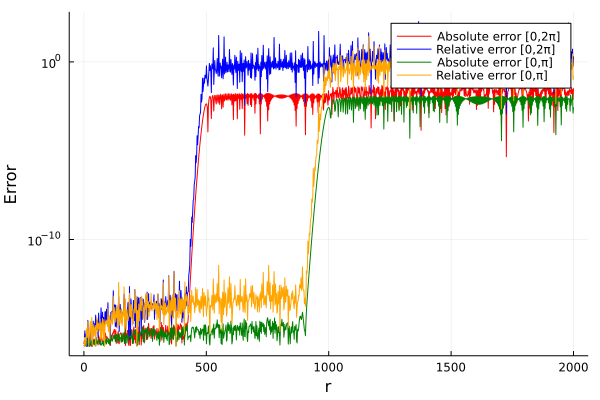

In [2]:
using SpecialFunctions
using Plots

r=LinRange(0,2000,1000)
abs_error2 = abs.(besselJ2.(1,r)-besseljx.(1,r)).+1e-16
rel_error2 = abs.(besselJ2.(1,r)-besseljx.(1,r))./abs.(besseljx.(1,r)).+1e-16

abs_error = abs.(besselJ.(1,r)-besseljx.(1,r)).+1e-16
rel_error = abs.(besselJ.(1,r)-besseljx.(1,r))./abs.(besseljx.(1,r)).+1e-16

plot(r,abs_error2,label="Absolute error [0,2π]",color="red",yaxis=:log)
plot!(r,rel_error2,label="Relative error [0,2π]",color="blue",yaxis=:log)
plot!(r,abs_error,label="Absolute error [0,π]",color="green",yaxis=:log)
plot!(r,rel_error,label="Relative error [0,π]",color="orange",yaxis=:log)
ylabel!("Error")
xlabel!("r")

Es claro que la implementación con la integral en el rango de 0 a $2\pi$ es menos estable que la función definida como

$$
J_m(x)=\frac{1}{\pi}\int_0^{\pi}\cos{\left(m\theta-x\sin{\theta}\right)}d\theta.
$$

Se sumó el 1e-16 en los errores porque algunos daban 0 y había problemas numéricos al sacar el logaritmo de los datos.

Ahora, veamos cuál de las dos implementaciones es más eficiente

In [3]:
using BenchmarkTools

@benchmark besselJ

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  0.013 ns … 5.494 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     0.014 ns             ┊ GC (median):    0.00%
 Time  (mean ± σ):   0.015 ns ± 0.055 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

      █   ▆                                                  
  ▃▁▁▁█▁▁▁█▁▁▁▁▃▁▁▁▂▁▁▁▂▁▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▂▁▁▁▃▁▁▁▂ ▂
  0.013 ns       Histogram: frequency by time      0.026 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [4]:
@benchmark besselJ2

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  0.013 ns … 0.507 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     0.014 ns             ┊ GC (median):    0.00%
 Time  (mean ± σ):   0.015 ns ± 0.005 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

      █   ▃                                                  
  ▃▁▁▁█▁▁▁█▁▁▁▁▃▁▁▁▂▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▂▁▁▁▃▁▁▁▂ ▂
  0.013 ns       Histogram: frequency by time      0.026 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

Como las dos funciones son igual de rápidas, entonces la función con la integral que va de 0 a $\pi$ se prefiere sobre la otra porque es estable en un intervalo más grande. La inestabilidad de la función se atribulle al número de pasos de la integración, si este se aumenta, entonces el rango en el que la función es estable crece.

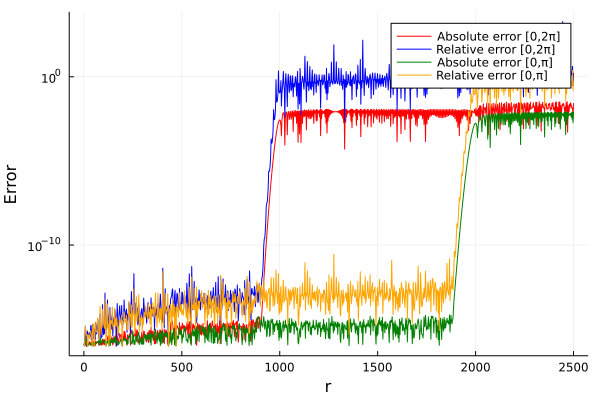

In [5]:
r=LinRange(0,2500,1000)
abs_error2 = abs.(besselJ2.(1,r,2000)-besseljx.(1,r)).+1e-16
rel_error2 = abs.(besselJ2.(1,r,2000)-besseljx.(1,r))./abs.(besseljx.(1,r)).+1e-16

abs_error = abs.(besselJ.(1,r,2000)-besseljx.(1,r)).+1e-16
rel_error = abs.(besselJ.(1,r,2000)-besseljx.(1,r))./abs.(besseljx.(1,r)).+1e-16

plot(r,abs_error2,label="Absolute error [0,2π]",color="red",yaxis=:log)
plot!(r,rel_error2,label="Relative error [0,2π]",color="blue",yaxis=:log)
plot!(r,abs_error,label="Absolute error [0,π]",color="green",yaxis=:log)
plot!(r,rel_error,label="Relative error [0,π]",color="orange",yaxis=:log)
ylabel!("Error")
xlabel!("r")

---

# B)

Utilice esta función para obtener un gráfico de densidad para la intensidad del patrón de difracción circular para una fuente puntual con $\lambda = 500\;nm$ en la región $0 \leq r \leq 1 \;\mu m$.

---

La densidad de intensidad está dada por
$$
    I(r)=\left(\frac{2J_1(kr)}{kr}\right)^2,
$$
con
$$
    k=\frac{2\pi}{\lambda}.
$$
Es importante recordar que
$$
    \lim_{x\to0}\frac{J_1(x)}{x}=\frac{1}{2}
$$

Entonces, la función que calcula la intensidad luminosa es

In [6]:
function I(r,λ=0.5) #λ en μm
    k = 2*π/λ
    if r<=1e-9
        return 1
    end
    return (2*besselJ(1,k*r)/(k*r))^2
end

I (generic function with 2 methods)

Veámos la gráfica de la intensidad en función de $r$

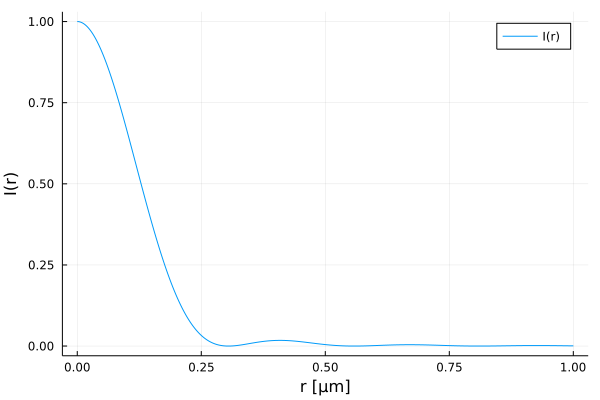

In [7]:
r=LinRange(0,1,1000) #0 ≤ r ≤ 1 μm
plot(r, I.(r),label="I(r)")
ylabel!("I(r)")
xlabel!("r [μm]")

La intensidad en el plano es 

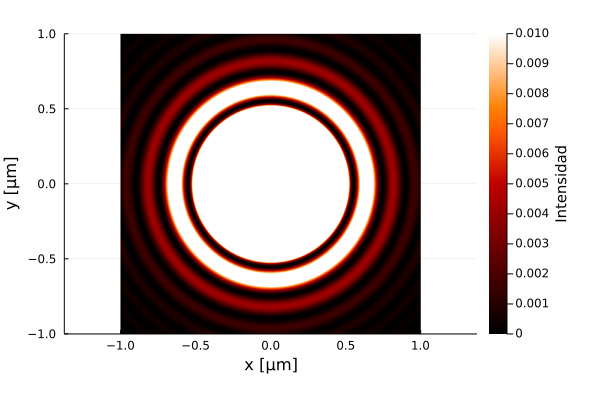

In [8]:
X=LinRange(-1,1,1000)
Y=LinRange(-1,1,1000)
Z=zeros(length(X),length(Y))
for i in 1:length(X), j in 1:length(Y)
    Z[j,i]=I(X[i]^2+Y[j]^2)
end

heatmap(X,Y,Z,clim=(0,0.01), color=:gist_heat, xlabel="x [μm]", ylabel="y [μm]",colorbar_title=" \n\nIntensidad", thickness_scaling = 1,right_margin = 10Plots.mm, aspect_ratio = 1)

La escala se redujo de 0 a 0.01 para que los anillos fueran visibles. Sin reescalar el patrón se ve de la siguiente manera: 

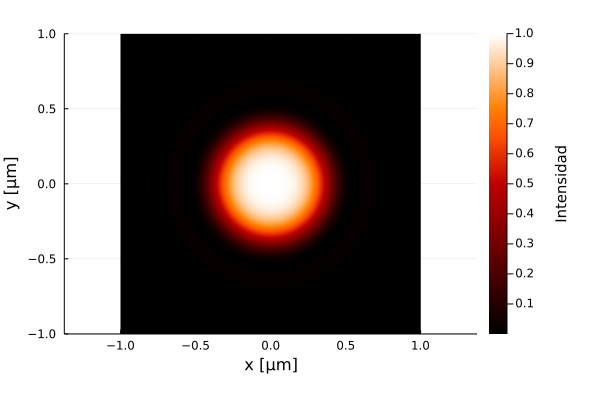

In [9]:
heatmap(X,Y,Z, color=:gist_heat, xlabel="x [μm]", ylabel="y [μm]",colorbar_title=" \nIntensidad",thickness_scaling = 1,right_margin = 10Plots.mm, aspect_ratio = 1)

Hay un bug en Julia y la escala logaritmica no está funcionando para este tipo de gráficas (https://github.com/JuliaPlots/Makie.jl/issues/1405), sin embargo se puede hacer la gráfica con el logaritmo de los datos.

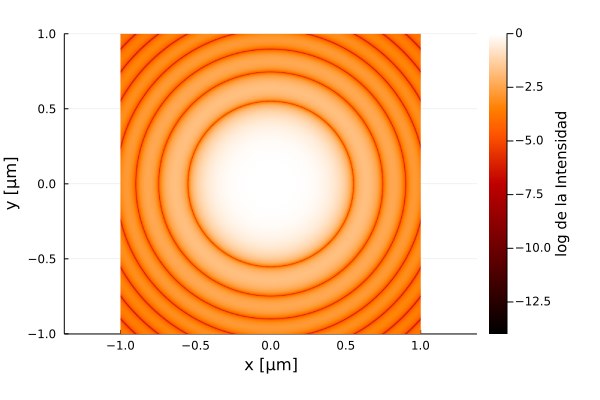

In [10]:
heatmap(X,Y,log10.(Z), xlabel="x [μm]", ylabel="y [μm]",color=:gist_heat,colorbar_title=" \n\nlog de la Intensidad", 
thickness_scaling = 1,right_margin = 10Plots.mm,aspect_ratio = 1)

---

## Ejercicio 2


# A)

Suponga que la función de transmisión de una rejilla es $q(u) = \sin^2
(\alpha u)$ donde $\alpha$ es un parámetro constante. Encuentre la relación entre $\alpha$ y la separación entre los "slits"de la rejilla.

---

$q(u)$ es la función de trasmisión de la rejilla. Es por esto que es natural pensar que la rejilla está presente donde la función no es cero. Entonces, la distancia entre dos picos será la distancia entre los centros de las rejillas. Viendo la gráfica de la función, es claro que las rejillas se repiten cada $\frac{\pi}{a}$.

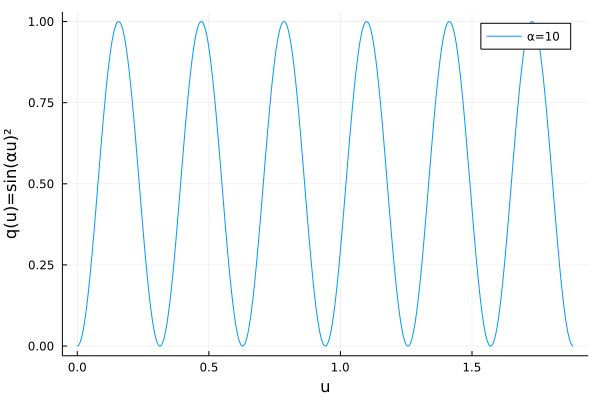

In [11]:
α=10
q(u)=sin(α*u)^2
u=LinRange(0,6*pi/α,1000)
plot(u, q.(u),label="α=$α")
xlabel!("u")
ylabel!("q(u)=sin(αu)²")

---
# B)

Escriba una función que calcule la función de transmisión $q(u) = sin^2
(\alpha u)$ para una rejilla con
una separación de 20 µm entre slits.

---
Como $d=\frac{\pi}{a}$ entonces $a=\frac{\pi}{d}$.

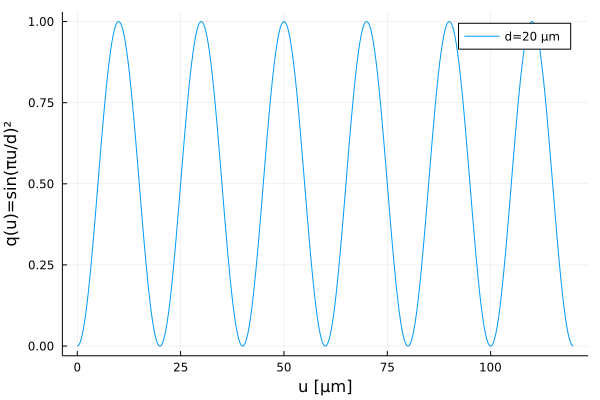

In [12]:
d=20 #μm
q(u)=sin(π*u/d)^2


u=LinRange(0,6*d,1000)
plot(u, q.(u),label="d=$d μm")
xlabel!("u [μm]")
ylabel!("q(u)=sin(πu/d)²")

---
# C)

Implemente un código que calcule y grafique la intensidad del patrón de intensidad producido
por la rejilla descrita en el punto anterior si esta tiene un total de 10 slits y la longitud de onda
de la radiación incidente es λ = 500 nm. Además, asuma que la longitud focal del lente es
f = 1 m y que el ancho de la pantalla es de 10 cm

---

EL patrón de difracción del arreglo de rejillas está dado por

$$
I(x)=\left|\int_{-w/2}^{w/2} \sqrt{q(u)}exp\left(\frac{2\pi i xu}{\lambda f}\right)du\right|^2.
$$

La función de trasmisión de la luz es

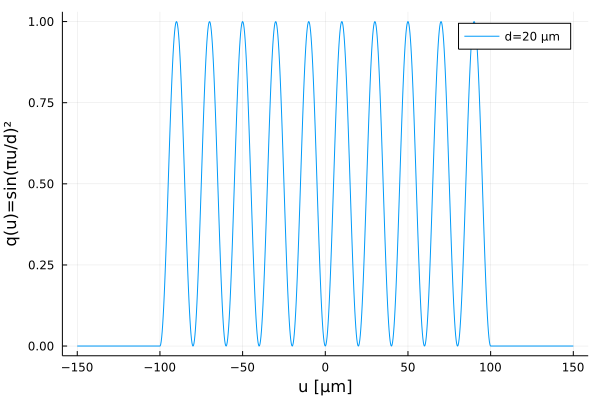

In [13]:
function q(u,d)
    if u<-5*d    #10d/2, caben 10 rejillas
        return 0
    elseif u>5*d #10d/2, caben 10 rejillas
        return 0
    else
        return sin(π*u/d)^2
    end
end

d=20 # μm
x=LinRange(-150,150,1000)
II=q.(x,d) #d = 10 μm
plot(x, II,label="d=$d μm")
xlabel!("u [μm]")
ylabel!("q(u)=sin(πu/d)²")

Ahora, el patrón de difracción en la pantalla. Como la función $q(u)$ tiene la información de los límites, es decir fuera de la región $[-100,100]\;\mu m$ vale 0, entonces para calcular el patrón de difracción los límites de la integral pueden ser $w\geq 200 \mu m$ ya que una integral con un límite mayor daría el mismo resultado. 

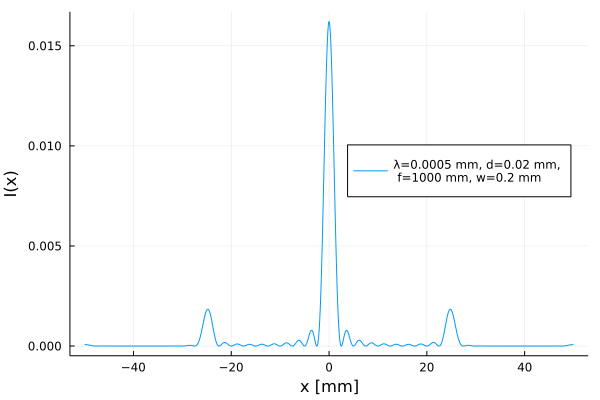

In [14]:
function I(x,q,w,L,f,d,N=1000)
    Integrand(u)=sqrt(q(u,d))*exp(2*pi*x*u*im/(L*f))
    a=-w/2
    b=w/2
    h = (b-a)/N
    #Simpson Integration
    s = Integrand(a) + Integrand(b)
    s += 4.0*sum(Integrand.(a.+h*collect(1:2:N)))
    s += 2.0*sum(Integrand.(a.+h*collect(2:2:N-1)))
    return abs(s*h/3.0)^2 
end

λ=0.0005 #mm -> 500 nm
d=0.02   #mm -> 20 μm
f=1000   #mm -> 1 m
w=d*10   #mm -> 10d el límite de integración más pequeño posible
x=LinRange(-50,50,10000) #la pantall tiene 100 mm de ancho
II=I.(x,q,w,λ,f,d)
plot(x,II,label="λ=$λ mm, d=$d mm,\n f=$f mm, w=$w mm",legend=:right)
xlabel!("x [mm]")
ylabel!("I(x)")

# D)
Generalice el código para graficar los siguientes casos:

1. Una rejilla con una función de transmisión
$$
q(u) = sin^2(\alpha u) sin^2(\beta u)
$$
donde $\alpha$ esta definido como en el punto anterior y $\beta=\frac{\alpha}{2}$.

2. La rejilla esta compuesta de dos slits "cuadrados" con 100 % de transmisión a través de los slits y 0 % de transmisión en otros puntos. En este caso debe calcular el patrón de difracción cuando uno de los slits tiene un tamaño de 10 µm de ancho, el otro slit tiene 20 µm de ancho y la separación entre los dos slits es de 60 µm.

---
La función de trasmisión del primer caso con 1 sola rejilla es

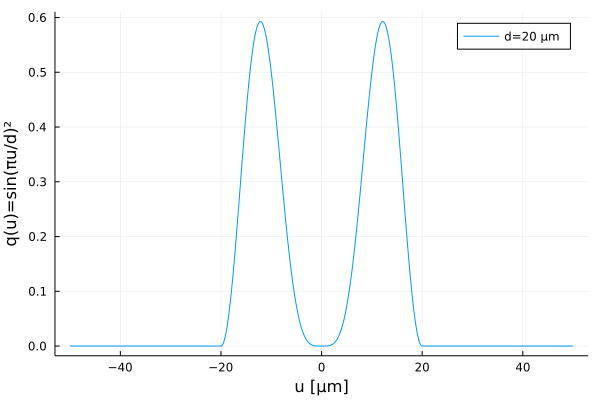

In [15]:
function q(u,d,N=1)
    if u<-N*d    #Nd, caben N rejillas porque como β=α/2, periodo=2d
        return 0
    elseif u>N*d #Nd, caben N rejillas
        return 0
    else
        return sin(π*u/d)^2*sin(π*u/(2*d))^2
    end
end

d=20 # μm
x=LinRange(-50,50,1000)
II=q.(x,d) #d = 10 μm
plot(x, II,label="d=$d μm")
xlabel!("u [μm]")
ylabel!("q(u)=sin(πu/d)²")

Entonces el patrón de difracción en este caso es

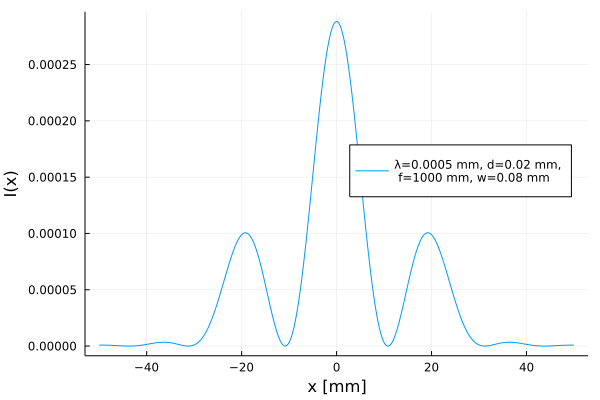

In [16]:
λ=0.0005 #mm -> 500 nm
d=0.02   #mm -> 20 μm
f=1000   #mm -> 1 m
w=d*4    #mm -> 4d el límite de integración más pequeño posible
x=LinRange(-50,50,10000) #la pantall tiene 100 mm de ancho
II=I.(x,q,w,λ,f,d)
plot(x,II,label="λ=$λ mm, d=$d mm,\n f=$f mm, w=$w mm",legend=:right)
xlabel!("x [mm]")
ylabel!("I(x)")

Para el segundo caso, hay que extender el cálculo de la intensidad a dos dimensiones. de modo que

$$
I(x,y)=\left|\int_{-w_x/2}^{w_x/2}\int_{-w_y/2}^{w_y/2}\sqrt{q(u,v)}exp\left(\frac{2\pi i xu}{\lambda f}\right)exp\left(\frac{2\pi i yv}{\lambda f}\right)dudv\right|^2.
$$

Como las rejillas son cuadradas, la función de trasmisión es

$$q(u,v)= \left\{ \begin{array}{lcc}
             1 &   si  & (u\in[-5,5], \; y \; v\in[-5,5]\;) \lor \; (\in[40,80],\; y \; v\in[-10,10]) \\
             0 &  O.C  \\
             \end{array}
   \right.$$
  
Esto asumiendo que el centro del primer cuadrado, el que tiene un ancho de $10\;\mu m$ está en $(0,0)$ y el centro del otro cuadrado, que tiene un ancho de $20\;\mu m$ está en $(60,0)$. Graficando la función de transmisión con todas las medidas en $mm$ se tiene que  

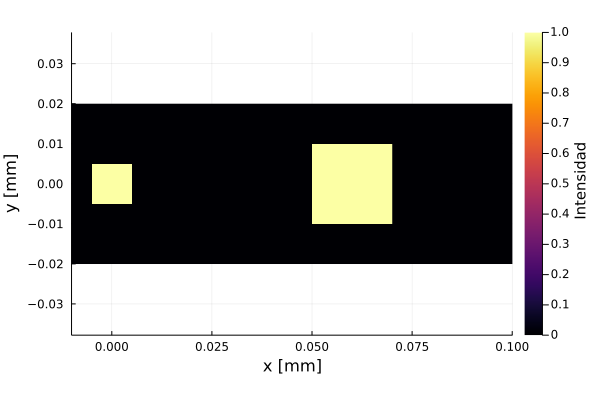

In [17]:
function q(u,v)
    if -0.005<=u<=0.005 && -0.005<=v<=0.005
        return 1
    elseif 0.05<=u<=0.07 && -0.01<=v<=0.01
        return 1
    else
        return 0
    end
end

X=LinRange(-0.01,0.1,1000)
Y=LinRange(-0.02,0.02,1000)
Z=zeros(length(X),length(Y))
    
for i in 1:length(X), j in 1:length(Y)
    Z[j,i]=q(X[i],Y[j])
end

heatmap(X,Y,Z, xlabel="x [mm]", ylabel="y [mm]",colorbar_title=" Intensidad",aspect_ratio = 1)

La regla de Simpson para una doble integral es

$$\int_a^b\int_c^df(x,y) \,dx \,dy\approx S_{mn}=\frac{(b-a)(d-c)}{9mn} \sum_{i,j=0,0}^{m,n} W_{i+1,j+1} f(x_i,y_j) $$

$$W= \begin{pmatrix}
1&4&2&4& \ldots&4&1\\
4&16&8&16&\ldots&16&4\\
2&8&4&8&\ldots&8&2\\
\ldots&\ldots&\ldots&\ldots&\ldots&\ldots&\ldots&\\
1&4&2&4&\ldots&4&1\\
\end{pmatrix}$$

Sin embargo, como las variables son independientes, para este caso no es necesario hacer la doble integral porque esta es bastante costosa computacionalmentes, la alternativa es utilizar que 

$$
I(x,y)=\left|\int_{-w_x/2}^{w_x/2}\sqrt{q(u)_x}exp\left(\frac{2\pi i xu}{\lambda f}\right)du\int_{-w_y/2}^{w_y/2}\sqrt{q(v)_y}exp\left(\frac{2\pi i yv}{\lambda f}\right)dv\right|^2.
$$

Y realizar dos integrales simples. Pero, como las dimensiones de los rectangulos son diferentes, para poder usar este truco toca separar la integral en dos segín sus límites de integración.

$$
I(x,y)=\left|\int_{-0.005}^{0.005}exp\left(\frac{2\pi i xu}{\lambda f}\right)du\int_{-0.005}^{0.005}exp\left(\frac{2\pi i yv}{\lambda f}\right)dv+\int_{0.05}^{0.07}exp\left(\frac{2\pi i xu}{\lambda f}\right)du\int_{-0.01}^{0.01}exp\left(\frac{2\pi i yv}{\lambda f}\right)dv\right|^2
$$

Con los límites en mm y se reemplazó la función de trasmisión por 1. La implementación de la doble integral para el caso general es

In [18]:
#Esta implementación se demora mucho
function I(x,y,q,wx,wy,L,f,N=1000)
    Integrand(u,v)=q(u,v)*exp(2*pi*x*u*im/(L*f))*exp(2*pi*y*v*im/(L*f)) #quito el sqrt para hacerlo mas rapido
    ax=-wx/2
    bx=wx/2
    ay=-wy/2
    by=wy/2
    hx = (bx-ax)/N
    hy = (by-ay)/N
    #Calculate weghits for Simpson double Integration
    X=ones(N)
    Y=ones(N)
    for i in 2:N-1
        X[i]=((i+1)%2)*4+((i+2)%2)*2
        Y[i]=((i+1)%2)*4+((i+2)%2)*2
    end
    #Simpson double Integration
    s=0
    for j in 1:N, i in 1:N
        s+=X[i]*Y[j]*Integrand(ax+i*hx,ay+j*hy)
    end
    return abs(s*hx*hy/9.0)^2 
end

I (generic function with 5 methods)

La implementación que no requiere calcular dobles integrales es

In [19]:
function I(x,y,L,f,N=1000)
    Integrandx(u)=exp(2*pi*x*u*im/(L*f))
    Integrandy(v)=exp(2*pi*y*v*im/(L*f))

    #Simpson Integration
    #I1
    a=-0.005
    b=0.005
    h = (b-a)/N
    s1 = Integrandx(a) + Integrandx(b)
    s1 += 4.0*sum(Integrandx.(a.+h*collect(1:2:N)))
    s1 += 2.0*sum(Integrandx.(a.+h*collect(2:2:N-1)))
    s1=s1*h/3.0 
    #I2
    s2 = Integrandy(a) + Integrandy(b)
    s2 += 4.0*sum(Integrandy.(a.+h*collect(1:2:N)))
    s2 += 2.0*sum(Integrandy.(a.+h*collect(2:2:N-1)))
    s2=s2*h/3.0
    #I3
    a=0.05
    b=0.07
    h = (b-a)/N
    s3 = Integrandx(a) + Integrandx(b)
    s3 += 4.0*sum(Integrandx.(a.+h*collect(1:2:N)))
    s3 += 2.0*sum(Integrandx.(a.+h*collect(2:2:N-1)))
    s3=s3*h/3.0
    #I4
    a=-0.01
    b=0.01
    h = (b-a)/N
    s4 = Integrandy(a) + Integrandy(b)
    s4 += 4.0*sum(Integrandy.(a.+h*collect(1:2:N)))
    s4 += 2.0*sum(Integrandy.(a.+h*collect(2:2:N-1)))
    s4=s4*h/3.0
    
    return abs(s1*s2+s3*s4)^2 
end


λ=0.0005  #mm -> 500 nm
f=1000    #mm -> 1 m
N=500
X=LinRange(-50,50,N) #la pantall tiene 100 mm de ancho
Y=LinRange(-50,50,N)  #la pantall tiene 100 mm de ancho
Z=zeros(length(X),length(Y))
    
for j in 1:length(Y), i in 1:length(X)
    Z[j,i]=I(X[i],Y[j],λ,f)
end

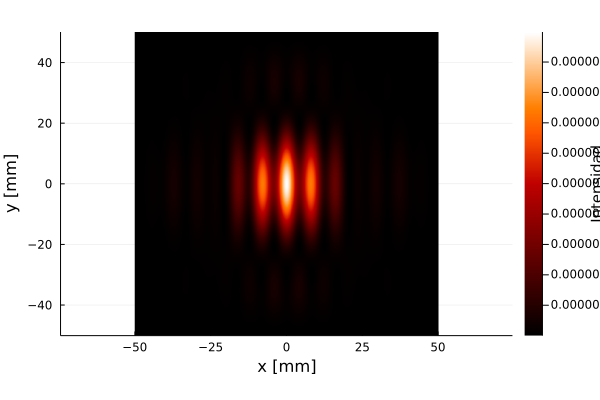

In [20]:
heatmap(X,Y,Z,color=:gist_heat,xlabel="x [mm]", ylabel="y [mm]",colorbar_title=" \n\nIntensidad",aspect_ratio = 1)

Para poder ver las partes más débiles del patrón, se reescalaron los ejes.

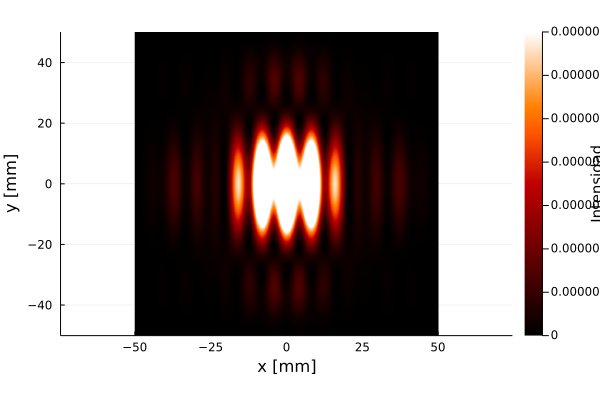

In [21]:
heatmap(X,Y,Z,clim=(0,0.00000007),color=:gist_heat,xlabel="x [mm]", ylabel="y [mm]",colorbar_title=" \nIntensidad",interpolate=true, aspect_ratio = 1)

La función de heatmap de la librería de Julia tiene bastantes errores. Tampoco se puede reescalar el eje del mapa de color ni coocarlo en notación científica.